In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
mpg = sns.load_dataset('mpg')

In [28]:
wine = pd.read_csv('./data/winequality-red.csv')

In [29]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

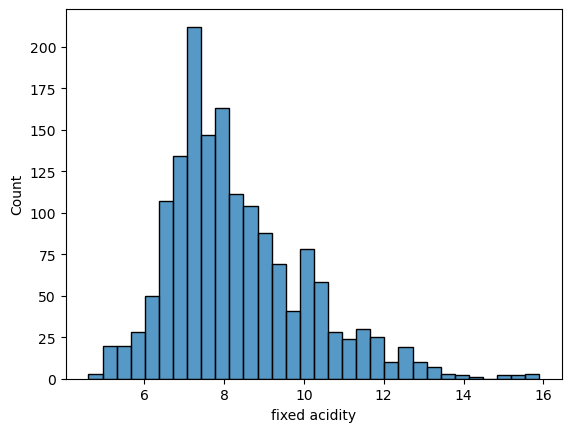

In [37]:
sns.histplot(wine['fixed acidity'])

In [38]:
wine[wine['fixed acidity'] > 14.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5


<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

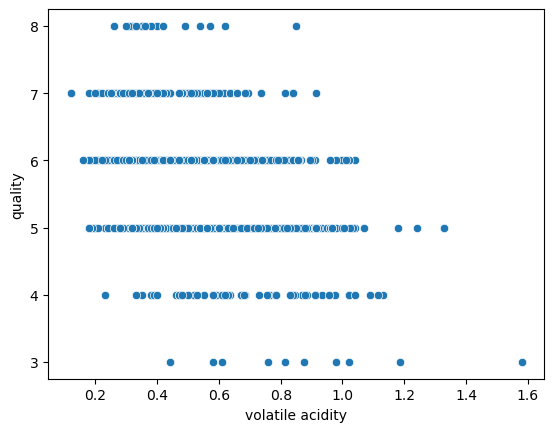

In [49]:
sns.scatterplot(x=wine['volatile acidity'], y=wine['quality'])

In [51]:
wine_2 = wine.drop(['sulphates', 'density', 'total sulfur dioxide', 'chlorides', 'residual sugar', 'fixed acidity'],axis=1)

In [52]:
wine_2

,volatile acidity,citric acid,free sulfur dioxide,pH,alcohol,quality
0,0.700,0.00,11.0,3.51,9.4,5
1,0.880,0.00,25.0,3.20,9.8,5
2,0.760,0.04,15.0,3.26,9.8,5
3,0.280,0.56,17.0,3.16,9.8,6
4,0.700,0.00,11.0,3.51,9.4,5
...,...,...,...,...,...,...
1594,0.600,0.08,32.0,3.45,10.5,5
1595,0.550,0.10,39.0,3.52,11.2,6
1596,0.510,0.13,29.0,3.42,11.0,6
1597,0.645,0.12,32.0,3.57,10.2,5


In [53]:
y = wine_2['quality']

In [54]:
X = wine_2.drop('quality', axis=1)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()

In [63]:
lm.fit(X_train, y_train)

LinearRegression()

In [66]:
lm.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['volatile acidity', 'citric acid', 'free sulfur dioxide', 'pH',
        'alcohol'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-1.4424815 , -0.30734114, -0.00325603, -0.74537173,  0.33476171]),
 'rank_': 5,
 'singular_': array([355.34109639,  36.95900597,   8.49654863,   4.75036715,
          3.43557465]),
 'intercept_': 5.520704913528447}

In [67]:
preds = lm.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error

In [71]:
mean_squared_error(y_test, preds, squared=False)

0.6191438263486236

In [72]:
import matplotlib.pyplot as plt

In [78]:
data = {'preds':preds, 'actual':y_test}

In [81]:
results = pd.DataFrame(data)

In [83]:
results['residual'] = results['actual']-results['preds']

In [88]:
full_df = pd.concat([X_test, results], axis=1)

<AxesSubplot:>

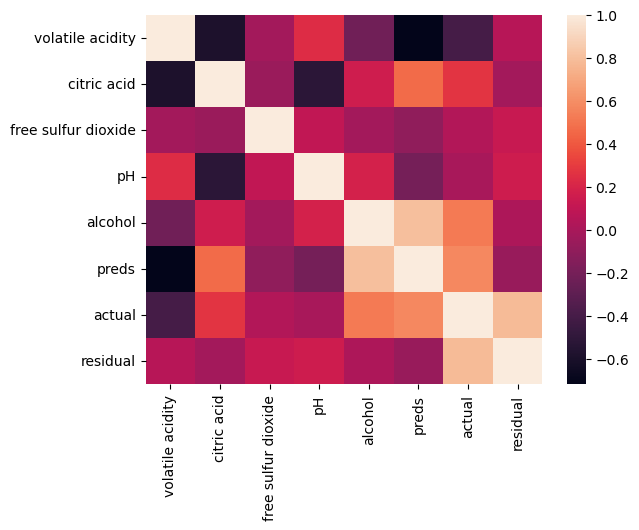

In [89]:
sns.heatmap(full_df.corr())

In [90]:
full_df.describe()

,volatile acidity,citric acid,free sulfur dioxide,pH,alcohol,preds,actual,residual
count,400.00000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000,400.000000
mean,0.53540,0.268050,16.433750,3.31485,10.384833,5.618158,5.580,-0.038158
std,0.18434,0.194314,11.016221,0.16852,1.051354,0.474047,0.755,0.618741
min,0.16000,0.000000,3.000000,2.87000,8.500000,4.565992,3.000,-2.123556
25%,0.39750,0.080000,8.000000,3.20000,9.500000,5.245085,5.000,-0.438529
50%,0.52500,0.260000,14.000000,3.31000,10.100000,5.587505,5.500,-0.085721
75%,0.65625,0.430000,22.000000,3.42000,11.000000,5.935039,6.000,0.381918
max,1.33000,0.760000,68.000000,4.01000,13.600000,7.127474,8.000,1.534896
